In [4]:
! python --version

Python 3.10.6


In [ ]:
pixel_count = []

In [18]:
def generate_images(width: int, height: int) -> None:
    ## Max image size = 5000 x 5000
    import shutil, os
    import numpy
    from PIL import Image
    try:
        os.mkdir("scalable_images")
    except:
        print("Removing existing directory contents")
        shutil.rmtree("scalable_images")
        os.mkdir("scalable_images")
    pixel_count = []
    
    numpy.random.seed(201)
    img_width = width
    img_height = height
    image_num = 0;
    while (img_width * img_height <= 5000**2):
        pixel_count.append(img_width * img_height)
        # imarray = numpy.random.rand(img_height, img_width, 3) * 255 
        # im = Image.fromarray(imarray.astype('uint8')).convert('RGBA')
        # im.save(f"scalable_images/img-no-{image_num}-{img_width}x{img_height}.png")
        if (img_width < img_height):
            img_width += 500
        else:
            img_height += 375
        image_num += 1
    print("pixel_counts = ", pixel_count)
generate_images(500, 375)

pixel_counts =  [187500, 375000, 750000, 1125000, 1687500, 2250000, 2812500, 3750000, 4500000, 5625000, 6562500, 7875000, 9000000, 10125000, 11812500, 13125000, 15000000, 16500000, 18562500, 20250000, 21937500, 24375000]


In [90]:
pixel_counts =  [187500, 375000, 750000, 1125000, 1687500, 2250000, 2812500, 3750000, 4500000, 5625000, 6562500, 
                 7875000, 9000000, 10125000, 11812500, 13125000, 15000000, 16500000, 18562500, 20250000, 21937500, 24375000]

compressedTimes = {
    "quadtrees": [42,8,5,6,10,15,19,37,40,58,96,53,61, 68, 78, 88, 69, 102, 223, 174, 201, 216],
    "octree_+_uniform_quantised_huffman": [136, 121, 203, 321, 615, 815, 951, 1449, 1519, 2801, 3889, 3799, 3706, 3947, 5182, 5575, 7009, 9768, 9532, 10139, 11427, 12294],
    "kdtree_+_uniform_quantised_huffman": [614, 682, 1832, 2851, 4661, 6966, 8797, 8753, 10858, 14832, 20405, 22221, 22085, 26312, 33122, 39959, 43675, 53079, 52916, 65223, 67022, 81038],
    "huffman": [120, 122, 301, 291, 532, 927, 898, 1668, 2811, 2811, 3033, 3355, 4406, 5003, 10359, 11924, 6607, 20065, 16953, 19673, 19999, 17454],
    "uniformed_quantised_huffman": [218, 254, 226, 346, 551, 885, 1015, 1391, 1466, 1755, 3358, 4305, 4320, 6498, 9525, 10756, 7366, 7762, 8471, 13660, 13147, 14369],
}
bytesSaved  = {
    "quadtrees": [654967, 1313331, 2603679, 3903291, 5824503, 7778803, 9720619, 12899132, 15514508, 19350750, 22567725, 27048637, 30920786, 34772821, 40533313, 45031671, 51424297, 56564544, 63599488, 69382091, 75173251, 83480873],
    "octree_+_uniform_quantised_huffman": [514101, 1031840, 2040938, 3059300, 4558637, 6091062, 7611003, 10086391, 12139267, 15131759, 17645609, 21142146, 24170545, 27178830, 31673697, 35187680, 40174056, 44189303, 49677505, 54194483, 58720018, 65199515],
    "kdtree_+_uniform_quantised_huffman": [443725, 891152, 1759625, 2637362, 3925761, 5247249, 6556252, 8680078, 10451704, 13022321, 15184608, 18188958, 20795482, 23381892, 27243946, 30265742, 34548993, 38001740, 42716504, 46600670, 50493392, 56058827],
    "huffman": [85044, 181196, 347101, 522272, 756819, 1024459, 1279611, 1647012, 2013497, 2476418, 2882278, 3427594, 3926426, 4405124, 5105584, 5668377, 6438776, 7081229, 7931862, 8654442, 9385628, 10384363],
    "uniformed_quantised_huffman": [443725, 891152, 1759625, 2637362, 3925761, 5247249, 6556252, 8680078, 10451704, 13022321, 15184608, 18188958, 20795482, 23381892, 27243946, 30265742, 34548993, 38001740, 42716504, 46600670, 50493392, 56058827]
}
decompressTimes = {
    "quadtrees": [10, 13, 30, 29, 45, 62, 97, 117, 129, 244, 222, 212, 279, 313, 477, 328, 489, 445, 945, 691, 958, 1125],
    "octree_+_uniform_quantised_huffman": [20, 39, 82, 111, 156, 196, 332, 454, 594, 943, 1146, 1495, 1659, 1853, 2815, 2967, 2546, 3513, 2738, 4342, 3567, 2859],
    "kdtree_+_uniform_quantised_huffman": [24, 18, 113, 144, 392, 394, 498, 663, 710, 1104, 1298, 1581, 1829, 1677, 2485, 2806, 3957, 4286, 4060, 5388, 2893, 4016],
    "huffman": [28, 45, 109, 95, 173, 391, 408, 698, 673, 1006, 775, 688, 1146, 2480, 2795, 2081, 1736, 2544, 2289, 2685, 2521, 3416],
    "uniformed_quantised_huffman": [38, 28, 64, 68, 162, 292, 298, 417, 472, 965, 1227, 892, 1043, 1853, 2413, 2495, 1967, 2088, 2395, 3097, 3517, 2419]
}
maeValues = {
    "quadtrees": [63.77640533333334, 63.79952177777778, 63.723686666666666, 63.75604474074074, 63.760400790123455, 63.75575792592593, 63.75989842962963, 63.74481342222222, 63.75437822222222, 63.76063324444444, 63.75181226666667, 63.75022725925926, 63.74864348148148, 63.75167344855967, 63.74677528042328, 63.743589180952384, 63.7543422, 63.7455077979798, 63.74274804938272, 63.758436312757205, 63.754109082621085, 63.7491683965812], 
    "octree_+_uniform_quantised_huffman": [16.116668444444443, 16.12324977777778, 16.114012, 16.124855407407406, 16.11361560493827, 16.111083555555556, 16.11732468148148, 16.111893066666667, 16.120089037037037, 16.113659259259258, 16.117009980952382, 16.117955851851853, 16.120861185185184, 16.11663588477366, 16.11709423633157, 16.11398354285714, 16.119592244444444, 16.119429616161614, 16.11874794163861, 16.117035670781892, 16.11906826210826, 16.119970352136754],
    "kdtree_+_uniform_quantised_huffman": [7.979633777777778, 7.9722684444444445, 7.9702866666666665, 7.972240296296296, 7.97144, 7.973885629629629, 7.972362785185185, 7.971877244444444, 7.971181185185185, 7.972500622222222, 7.973544126984127, 7.972493841269841, 7.971784814814815, 7.972933102880658, 7.974030024691358, 7.973012622222222, 7.9720922, 7.972411676767677, 7.9725282334455665, 7.972342897119342, 7.971943111111111, 7.97309842051282],
    "huffman": [0.0, 7.111111111111111e-06, 4.133333333333333e-05, 1.6888888888888888e-05, 2.2123456790123455e-05, 0.0, 0.0, 0.0, 5.703703703703704e-06, 0.0, 7.212698412698413e-06, 1.3968253968253969e-06, 0.0, 2.403292181069959e-06, 1.6649029982363315e-06, 0.0, 3.3333333333333335e-07, 3.797979797979798e-06, 3.0886644219977554e-06, 1.5967078189300412e-06, 2.339981006647673e-06, 1.258119658119658e-06],
    "uniformed_quantised_huffman": [7.979633777777778, 7.9722684444444445, 7.9702866666666665, 7.972240296296296, 7.97144, 7.973885629629629, 7.972362785185185, 7.971877244444444, 7.971181185185185, 7.972500622222222, 7.973544126984127, 7.972493841269841, 7.971784814814815, 7.972933102880658, 7.974030024691358, 7.973012622222222, 7.9720922, 7.972411676767677, 7.9725282334455665, 7.972342897119342, 7.971943111111111, 7.97309842051282]
}
mseValues = {
    "quadtrees": [16265.055402666667, 16278.165792, 16247.82202, 16260.392461333333, 16259.949369481481, 16261.825214222223, 16261.9069984, 16254.437860533333, 16259.737988888888, 16260.59452231111, 16257.857618895237, 16257.164035428572, 16257.067841333333, 16257.144098271605, 16255.995061248677, 16253.120362666667, 16258.7698426, 16254.976413575758, 16255.205736404041, 16260.815092049383, 16258.984969299145, 16256.289223753845],
    "octree_+_uniform_quantised_huffman": [1051.015328, 1051.6562986666668, 1050.6488573333334, 1051.8260844444444, 1050.569495111111, 1050.5539022222222, 1051.001256888889, 1050.4431746666667, 1051.2385506666667, 1050.6748074666666, 1050.998352152381, 1051.061901079365, 1051.2967682222222, 1050.9829296790124, 1051.0471304973546, 1050.6929432380953, 1051.2342863333333, 1051.2351621818182, 1051.1795934814816, 1051.0119211358024, 1051.1764077948717, 1051.2950798769232],
    "kdtree_+_uniform_quantised_huffman": [255.146784, 254.88270933333334, 254.77194266666666, 254.86772888888888, 254.79301748148148, 254.93706133333333, 254.84807573333333, 254.80940453333332, 254.794628, 254.85649493333332, 254.91979855238094, 254.8510314920635, 254.8207588888889, 254.88018854320987, 254.93593760846562, 254.8791353904762, 254.83946193333333, 254.85334545454546, 254.86420385185184, 254.84480814814816, 254.8304423931624, 254.8916850871795],
    "huffman": [0.0, 0.00017066666666666668, 0.011532, 0.002888, 0.007433481481481482, 0.0, 0.0, 0.0, 0.0013175555555555555, 0.0, 0.003072609523809524, 0.0001382857142857143, 0.0, 0.000526320987654321, 0.00029468783068783066, 0.0, 1.5e-05, 0.002142060606060606, 0.0015937508417508417, 0.00046464197530864197, 0.001081071225071225, 0.00034724102564102563],
    "uniformed_quantised_huffman": [255.146784, 254.88270933333334, 254.77194266666666, 254.86772888888888, 254.79301748148148, 254.93706133333333, 254.84807573333333, 254.80940453333332, 254.794628, 254.85649493333332, 254.91979855238094, 254.8510314920635, 254.8207588888889, 254.88018854320987, 254.93593760846562, 254.8791353904762, 254.83946193333333, 254.85334545454546, 254.86420385185184, 254.84480814814816, 254.8304423931624, 254.8916850871795]
}
psnrValues = {
    "quadtrees": [6.018248139367003, 6.014748934406905, 6.022852077431466, 6.0194933733836695, 6.019611719216103, 6.0191107200971175, 6.01908887855883, 6.021084063092142, 6.019668178199815, 6.019439405791788, 6.020170450460617, 6.020355730652377, 6.020381428054618, 6.020361056675135, 6.020668022075382, 6.021436093256818, 6.019926775914842, 6.0209401720871645, 6.0208789028894465, 6.0193804955407595, 6.019869312944909, 6.020589434454985],              
    "octree_+_uniform_quantised_huffman": [17.914713110458752, 17.912065335802097, 17.916227683443687, 17.911364241016166, 17.916555746209358, 17.91662020606555, 17.91477125468039, 17.917077973160477, 17.913790820589604, 17.91612041772446, 17.914783257642057, 17.91452066813459, 17.913550315111223, 17.914846986992448, 17.914581700004632, 17.916045454496782, 17.913808437715524, 17.91380481934034, 17.914034395163696, 17.914727188128982, 17.914047556836742, 17.91355728973207],
    "kdtree_+_uniform_quantised_huffman": [24.062902622339774, 24.067399859550214, 24.06928762228056, 24.067655118746593, 24.06892838738404, 24.066473854905908, 24.067990021330992, 24.06864907920618, 24.068900936196332, 24.067846549511714, 24.06676794256473, 24.067939651625096, 24.06845556107016, 24.06744281148906, 24.066492998006655, 24.067460756366156, 24.068136814239676, 24.06790021931167, 24.06771518577537, 24.068045705616964, 24.068290526926756, 24.06724692443188],
    "huffman": [float('inf'), 85.80931654611743, 67.51175727151741, 73.52483171970309, 69.4188809703061, float('inf'), float('inf'), float('inf'), 76.9331142429829, float('inf'), 73.2557298851581, 86.72303043573774, float('inf'), 80.91829672513704, 83.43718159100942, float('inf'), 96.3698910181223, 74.82248606554457, 76.106599337141, 81.45961919886108, 77.79226053004884, 82.72449330547374],
    "uniformed_quantised_huffman": 
[24.062902622339774, 24.067399859550214, 24.06928762228056, 24.067655118746593, 24.06892838738404, 24.066473854905908, 24.067990021330992, 24.06864907920618, 24.068900936196332, 24.067846549511714, 24.06676794256473, 24.067939651625096, 24.06845556107016, 24.06744281148906, 24.066492998006655, 24.067460756366156, 24.068136814239676, 24.06790021931167, 24.06771518577537, 24.068045705616964, 24.068290526926756, 24.06724692443188]
}
percentSaved = {
    "quadtrees": [99.97176227806676, 99.98591566452178, 99.99289517424873, 99.99526063436794, 99.99682386421385, 99.99762179861956, 99.99809686523872, 99.99856581553892, 99.99880758194828, 99.99904397384415, 99.99918025195953, 99.9993160515456, 99.99940170054815, 99.99946797812072, 99.99954358738049, 99.99958917971313, 99.99964024917159, 99.99967294106544, 99.99949999847485, 99.99954167056956, 99.99957697897781, 99.99961907587064],
    "octree_+_uniform_quantised_huffman": [78.47049234376145, 78.55557145858901, 78.38112896833321, 78.37373663883164, 78.26405465837827, 78.30147057689251, 78.29602366224029, 78.19321751686543, 78.24368165067784, 78.19652642107474, 78.18893730079569, 78.16290853627564, 78.1687774294022, 78.16071466470285, 78.14202712038323, 78.13952860392874, 78.12243203538735, 78.12165598813353, 78.1095228498024, 78.1098318451295, 78.11258502306842, 78.10084429677099],
    "kdtree_+_uniform_quantised_huffman": [67.7285576476909, 67.84477691935234, 67.57745412202787, 67.56444768713834, 67.39864864864865, 67.45413413672833, 67.44557343199183, 67.29098912756388, 67.3664893014641, 67.29556478795469, 67.28406839623165, 67.24491735721429, 67.25365125176697, 67.24150336614557, 67.21340951131334, 67.209626003423, 67.18393974294189, 67.18274916512019, 67.1645193383137, 67.16496396082182, 67.16907640769324, 67.15144612634958],
    "huffman": [12.980804454538793, 13.794731088163372, 13.33022769238332, 13.37966468860062, 12.993296808344068, 13.169566529733686, 13.163633378473632, 12.768210906050298, 12.978000918226353, 12.797407463773713, 12.771576986969551, 12.671879019352488, 12.698262289369891, 12.668228912967718, 12.595961986799164, 12.587482514600332, 12.520837837510934, 12.518806551694079, 12.471519174130814, 12.4735392223121, 12.485276573738306, 12.439164889250321],
    "uniformed_quantised_huffman": [67.7285576476909, 67.84477691935234, 67.57745412202787, 67.56444768713834, 67.39864864864865, 67.45413413672833, 67.44557343199183, 67.29098912756388, 67.3664893014641, 67.29556478795469, 67.28406839623165, 67.24491735721429, 67.25365125176697, 67.24150336614557, 67.21340951131334, 67.209626003423, 67.18393974294189, 67.18274916512019, 67.1645193383137, 67.16496396082182, 67.16907640769324, 67.15144612634958] 
}

In [81]:
import plotly.graph_objects as go

def plot_image(pixel_count: list[int], values: dict, title: str, y_axis: str) -> None:
    scaled_pixel_counts = [x/pixel_count[0] for x in pixel_count]
    fig = go.Figure()
    for idx, key in enumerate(values.keys()):
        # scaled_values = [x/values[key][0] for x in values[key]]
        fig.add_trace(
            go.Scatter(x = scaled_pixel_counts, y = values[key], mode = 'markers', name = key)
        )
    fig.update_yaxes(title = f"{y_axis}")
    fig.update_xaxes(title = "Increase in pixel_count by x times")
    fig.update_layout(width = 700, height = 500, title = title, showlegend = True)
    fig.show()

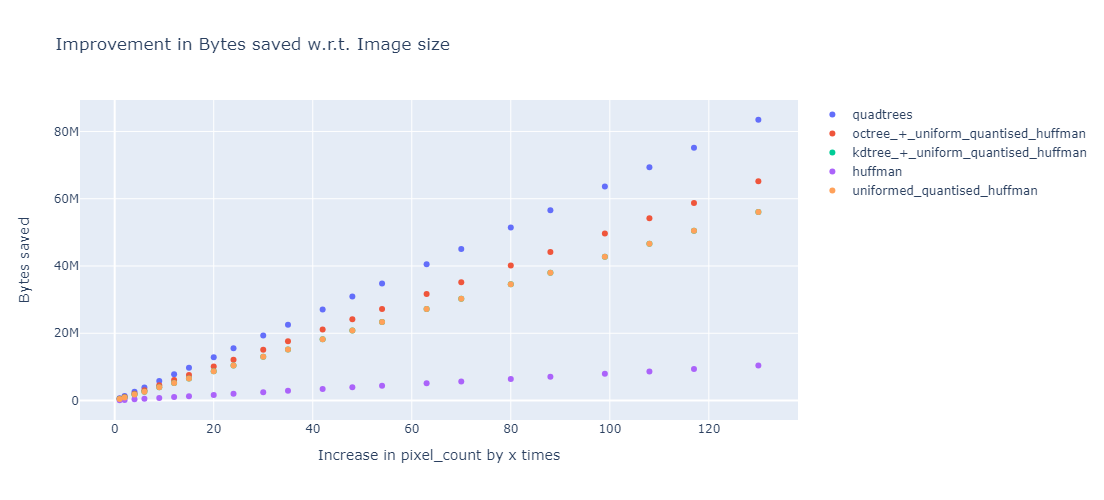

In [82]:
plot_image(pixel_counts, bytesSaved, "Improvement in Bytes saved w.r.t. Image size", "Bytes saved")

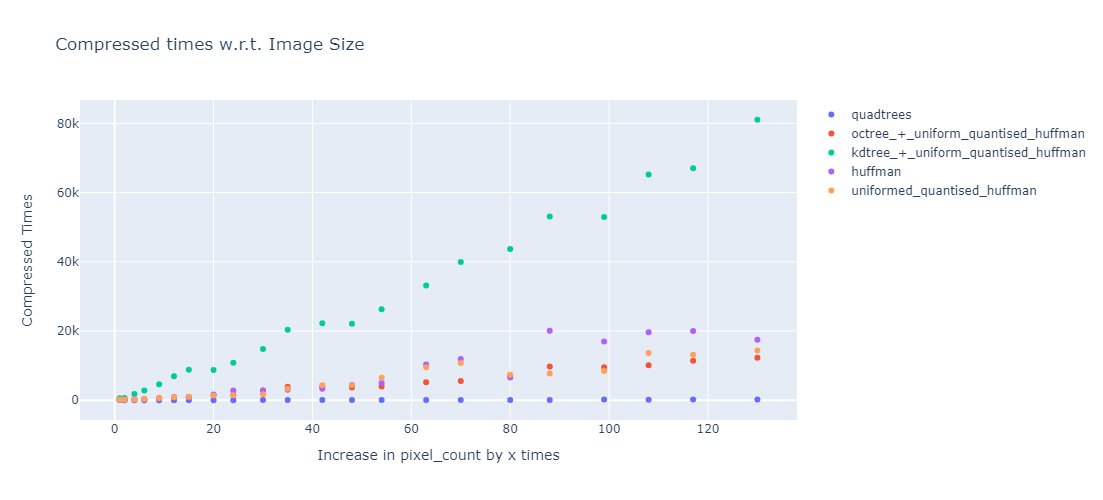

In [83]:
plot_image(pixel_counts, compressedTimes, "Compressed times w.r.t. Image Size", "Compressed Times")

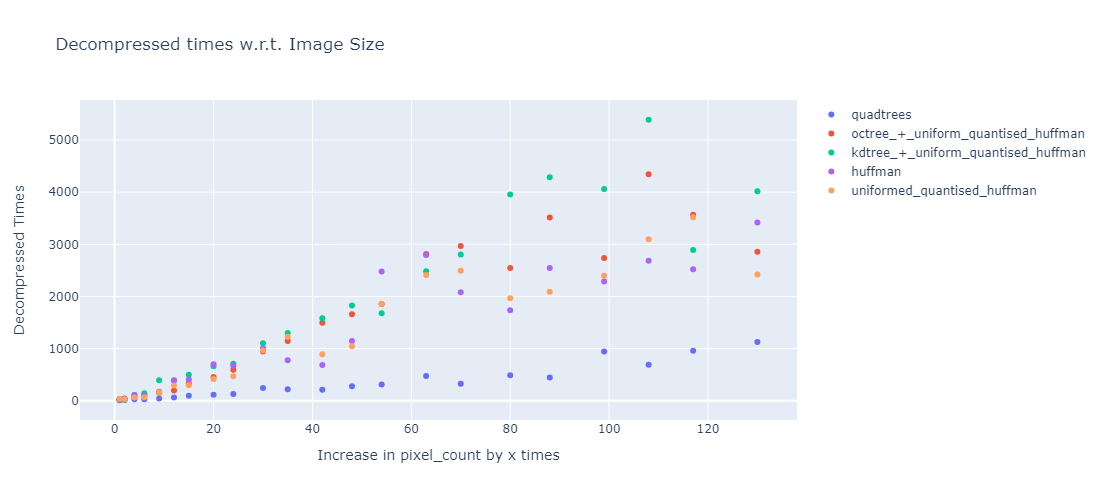

In [84]:
plot_image(pixel_counts, decompressTimes, "Decompressed times w.r.t. Image Size", "Decompressed Times")

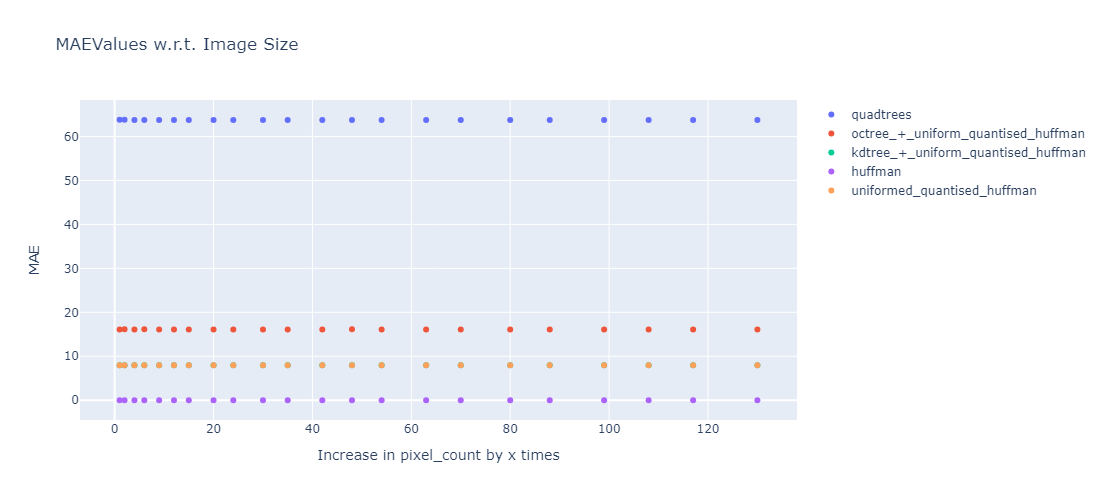

In [86]:
plot_image(pixel_counts, maeValues, "MAEValues w.r.t. Image Size", "MAE")

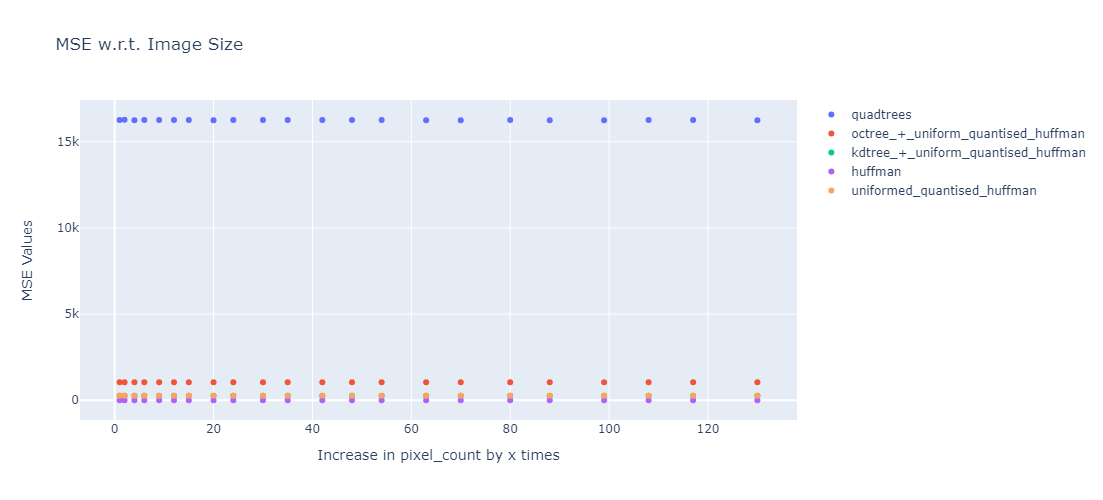

In [87]:
plot_image(pixel_counts, mseValues, "MSE w.r.t. Image Size", "MSE Values")

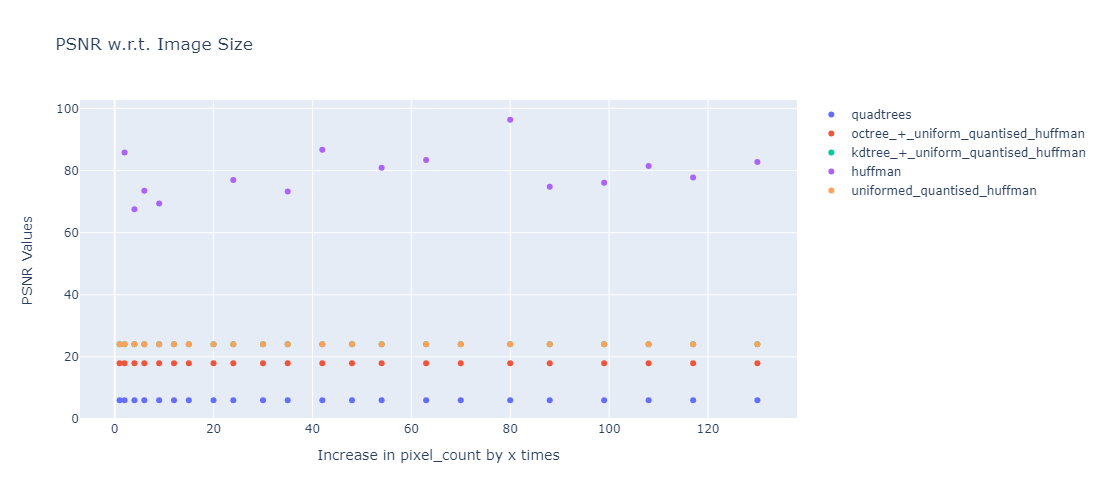

In [91]:
plot_image(pixel_counts, psnrValues, "PSNR w.r.t. Image Size", "PSNR Values")

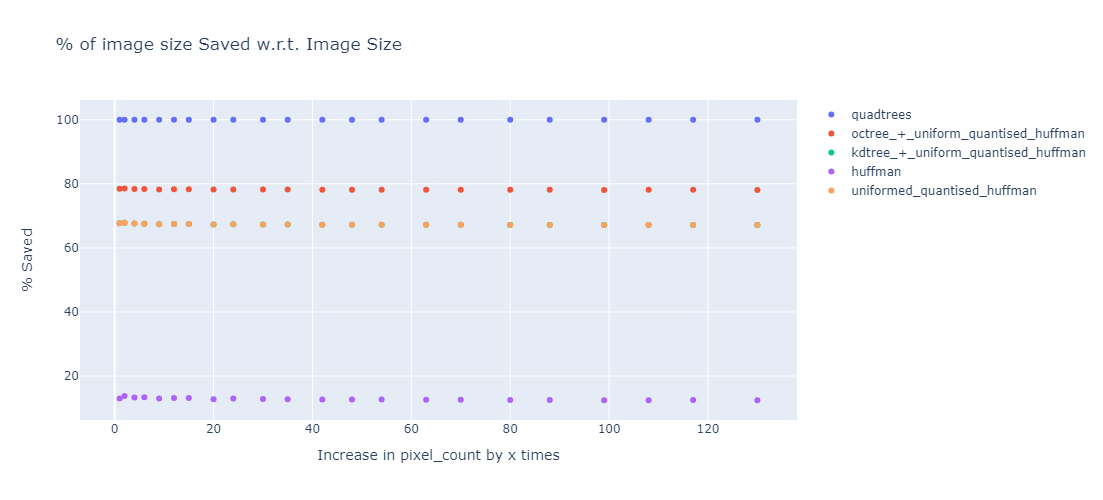

In [93]:
plot_image(pixel_counts, percentSaved, "% of image size Saved w.r.t. Image Size", "% Saved")

### Utility Functions to transfer console output to the dictionary format

In [58]:
print(
    give_values_of_str_map(
        "187500=38, 375000=28, 750000=64, 1125000=68, 1687500=162, 2250000=292, 2812500=298, 3750000=417, 4500000=472, 5625000=965, 6562500=1227, 7875000=892, 9000000=1043, 10125000=1853, 11812500=2413, 13125000=2495, 15000000=1967, 16500000=2088, 18562500=2395, 20250000=3097, 21937500=3517, 24375000=2419"
    )
)

[38, 28, 64, 68, 162, 292, 298, 417, 472, 965, 1227, 892, 1043, 1853, 2413, 2495, 1967, 2088, 2395, 3097, 3517, 2419]


In [89]:
print(
    give_values_of_str_float_map(
        "187500=6.018248139367003, 375000=6.014748934406905, 750000=6.022852077431466, 1125000=6.0194933733836695, 1687500=6.019611719216103, 2250000=6.0191107200971175, 2812500=6.01908887855883, 3750000=6.021084063092142, 4500000=6.019668178199815, 5625000=6.019439405791788, 6562500=6.020170450460617, 7875000=6.020355730652377, 9000000=6.020381428054618, 10125000=6.020361056675135, 11812500=6.020668022075382, 13125000=6.021436093256818, 15000000=6.019926775914842, 16500000=6.0209401720871645, 18562500=6.0208789028894465, 20250000=6.0193804955407595, 21937500=6.019869312944909, 24375000=6.020589434454985"
    )
)

[6.018248139367003, 6.014748934406905, 6.022852077431466, 6.0194933733836695, 6.019611719216103, 6.0191107200971175, 6.01908887855883, 6.021084063092142, 6.019668178199815, 6.019439405791788, 6.020170450460617, 6.020355730652377, 6.020381428054618, 6.020361056675135, 6.020668022075382, 6.021436093256818, 6.019926775914842, 6.0209401720871645, 6.0208789028894465, 6.0193804955407595, 6.019869312944909, 6.020589434454985]


34958}0321}

In [23]:
def give_values_of_str_map(arr_str: str):
    # 187500=654967, 375000=1313331, 750000=2603679, 1125000=3903291...
    str = arr_str.strip()
    strArr = str.split(", ")
    return [int(x.split('=')[1]) for x in strArr]

In [25]:
print(give_values_of_str_map("187500=654967, 375000=1313331, 750000=2603679, 1125000=3903291, 1687500=5824503, 2250000=7778803, 2812500=9720619, 3750000=12899132, 4500000=15514508, 5625000=19350750, 6562500=22567725, 7875000=27048637, 9000000=30920786, 10125000=34772821, 11812500=40533313, 13125000=45031671, 15000000=51424297, 16500000=56564544, 18562500=63599488, 20250000=69382091, 21937500=75173251, 24375000=8348087"))

[654967, 1313331, 2603679, 3903291, 5824503, 7778803, 9720619, 12899132, 15514508, 19350750, 22567725, 27048637, 30920786, 34772821, 40533313, 45031671, 51424297, 56564544, 63599488, 69382091, 75173251, 8348087]


In [27]:
def give_values_of_str_float_map(arr_str: str):
    # 187500=654967, 375000=1313331, 750000=2603679, 1125000=3903291...
    str = arr_str.strip()
    strArr = str.split(", ")
    return [float(x.split('=')[1]) for x in strArr]